# Project : Churning of Bank Customers.

> The dataset contains customers of a bank and their banking status. I want to create a model that predicts the churning probability of the customers. Churning is the act of bank customers leaving the bank.
> Some of the test questions that need to be answered are the following:
><ol>
    <li>Which country has the most number of churning customers.</li>
    <li>Which gender is mostly leaving the bank</li>
    <li>Does age affect churning</li>
    <li>Does Tenure,Credit score,Estimated Salary and number of products affect Churning</li>
    <li>Do people who have credit cards and active members leave or stay in the bank</li>
</ol>

### Data wrangling
> At this stage we :
> 1. <a href='#gather'>Gathering</a>
> 2. <a href='#assess'>Assessing</a>
> 3. <a href='#clean'>Cleaning</a>

##### <a id = 'gather'> Gathering</a>

> We load the dataset we have into a dataframe for more analysis.

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the dataset into a dataframe
df = pd.read_excel('P12-Churn-Modelling (1).xlsx')


##### <a id='assess'>Assessing</a>

> Check for the:
> 1. Structure of the dataframe
> 2. Null values
> 3. Datatypes
> 4. Duplicates
> 5. Data tidiness

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

- The dataframe is clean and tidy

##### <a id='clean'>Cleaning</a>

In [7]:
# Dropping unnecessary columns
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [8]:
#Confirming the cleaning process
df.shape

(10000, 12)

## Exploratory Data Analysis

1. Which country has the most number of churning customers?

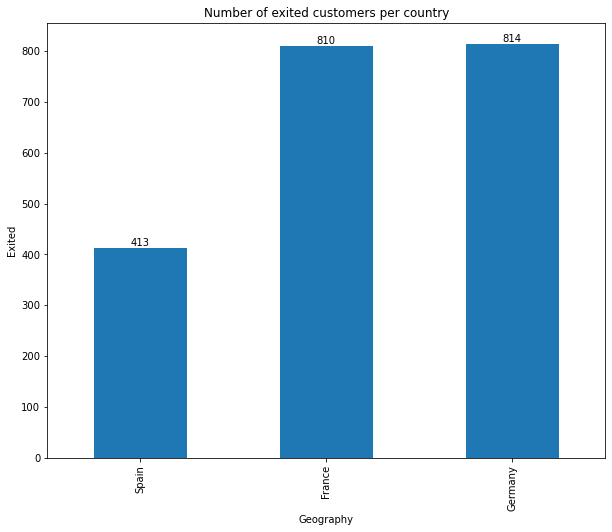

In [9]:
ax = df.groupby('Geography')['Exited'].sum().sort_values().plot(kind='bar',figsize=(10,8))
plt.title('Number of exited customers per country')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

2. Which Gender exits the bank the most.

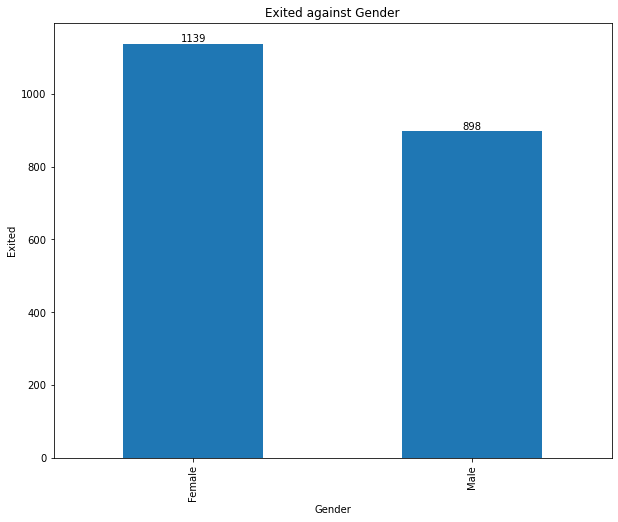

In [10]:
ax= df.groupby('Gender')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Exited against Gender')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

3. Filter by geography and gender

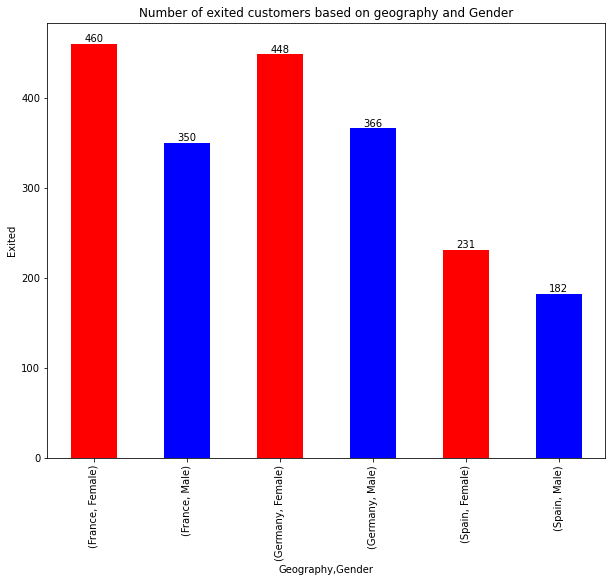

In [11]:
ax = df.groupby(['Geography','Gender'])['Exited'].sum().plot(kind='bar',figsize=(10,8),color=['red','blue'])
plt.title('Number of exited customers based on geography and Gender')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

4. Does age affect churning.

In [12]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [13]:
bin_edges = [18,32,37,44,92]
bin_names = ['Young Adults','Middle Aged','Slightly Older','Older']
df['Age_Categories'] = pd.cut(df['Age'],bin_edges,labels=bin_names)

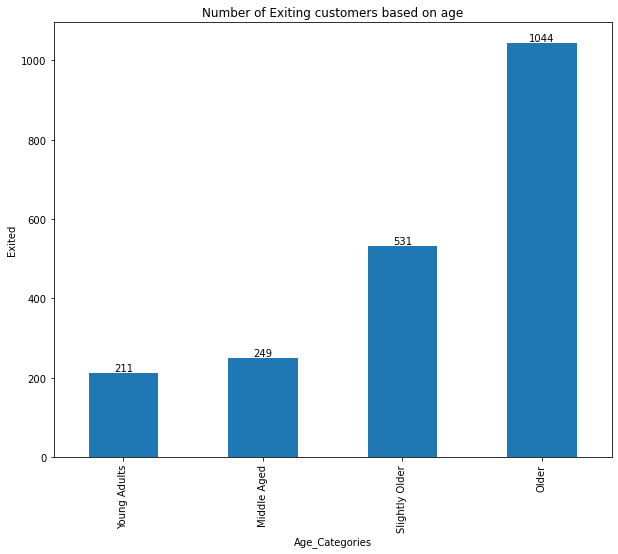

In [14]:
ax = df.groupby('Age_Categories')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Number of Exiting customers based on age')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);


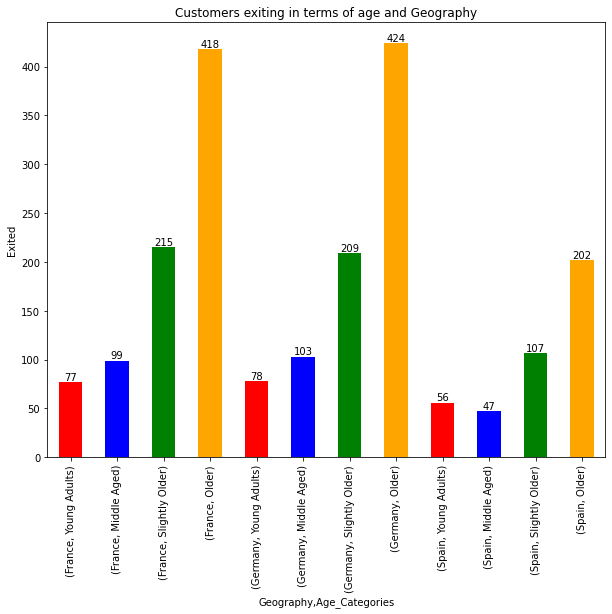

In [15]:
ax = df.groupby(['Geography','Age_Categories'])['Exited'].sum().plot(kind='bar',figsize=(10,8), color=['red','blue','green','orange'])
plt.title('Customers exiting in terms of age and Geography')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

5. Does tenure affect churning

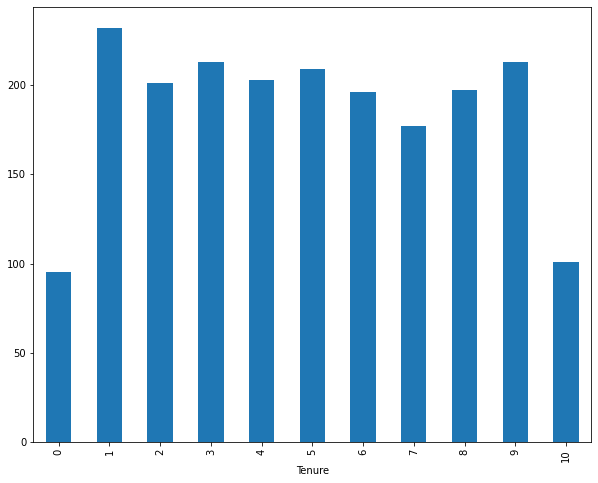

In [16]:
ax = df.groupby('Tenure')['Exited'].sum().plot(kind='bar',figsize=(10,8))


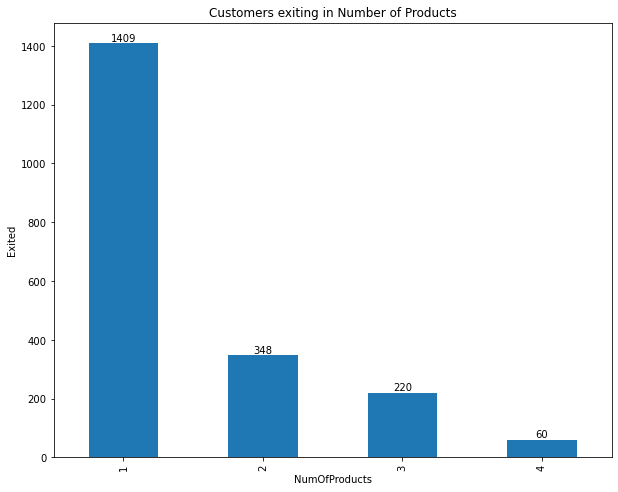

In [17]:
ax = df.groupby('NumOfProducts')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Customers exiting in Number of Products')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

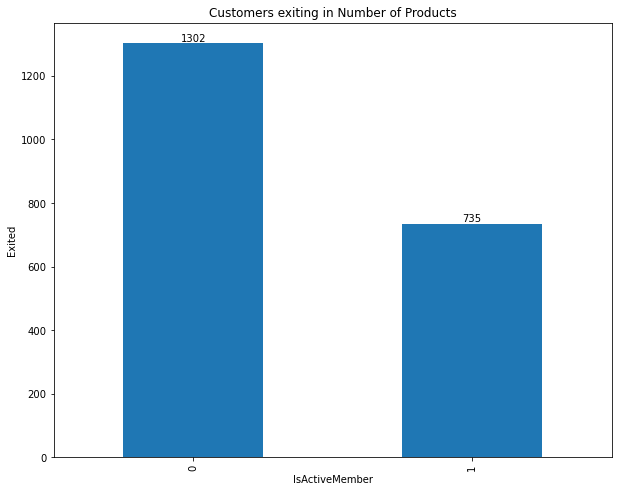

In [18]:
ax = df.groupby('IsActiveMember')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Customers exiting in Number of Products')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

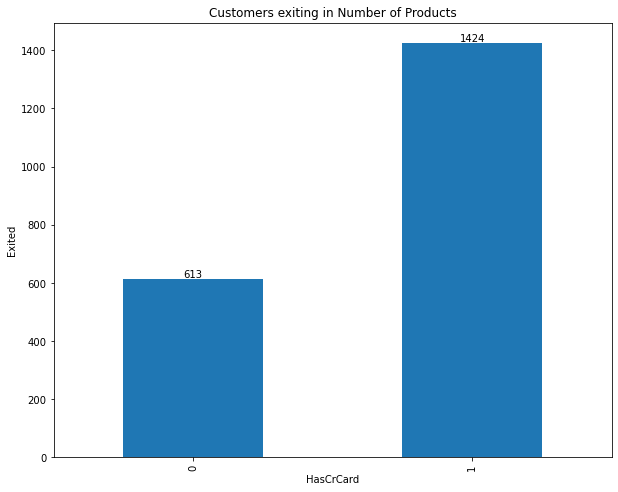

In [19]:
ax = df.groupby('HasCrCard')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Customers exiting in Number of Products')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

In [20]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [21]:
bin_edge = [350,584,652,718,850]
bin_names = ['Very Low','Low','Medium','High']
df['Credit_Rate'] = pd.cut(df['CreditScore'],bin_edge,labels=bin_names)

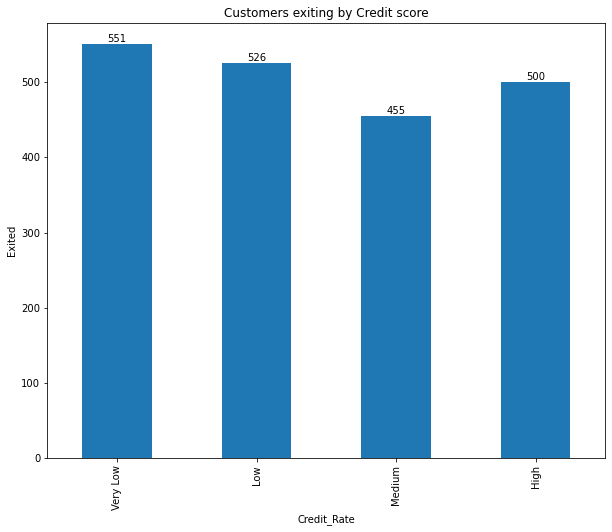

In [22]:
ax = df.groupby('Credit_Rate')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Customers exiting by Credit score')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

In [23]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [24]:
bin_edge = [11.58,51002.11,100193.915,149388.2475,199992.48]
bin_names = ['Very Low','Low','Medium','High']
df['Salary_levels'] = pd.cut(df['EstimatedSalary'],bin_edge,labels=bin_names)

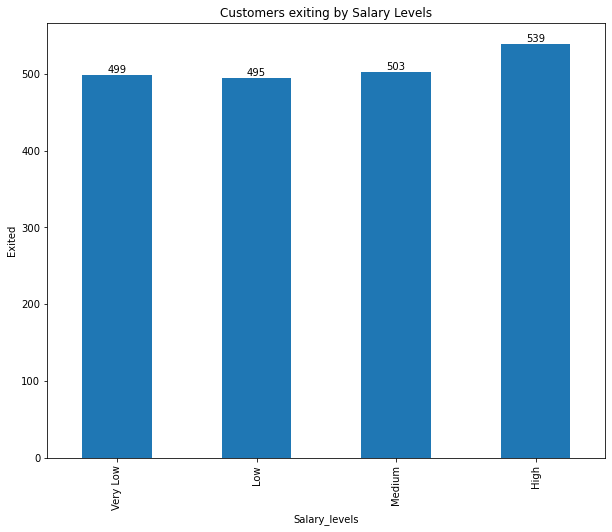

In [25]:
ax = df.groupby('Salary_levels')['Exited'].sum().plot(kind='bar',figsize=(10,8))
plt.title('Customers exiting by Salary Levels')
plt.ylabel('Exited')
for container in ax.containers:
    ax.bar_label(container);

### Conclusions.

1. More people are exiting the bank in France and Germany.
2. In general, women are exiting the bank more than men especially in France and Germany.
3. Older people from the age of 44 are leaving the bank more than younger people. This is seen across all relevant countries.
4. Tenure doesn't affect Churning rate in the bank.
5. Customers who have the least number of bank product are more likely to exit than the once with more products.
6. Inactive members are more likely to leave the bank.
7. People who have a credit card are more likely to leave the bank than those who don't.
8. The credit card rates do not affect churning.
9. Salary levels don't seem to be affecting the churning rate.